1. INTRODUÇÃO

A análise abaixo foi feita utilizando um Conjunto de dados que foram disponibilizadas no site www.kaggle.com.
Contendo dados de saúde e demográficos de 100.000 indivíduos, com o objetivo de facilitar a pesquisa e a modelagem preditiva relacionadas ao diabetes

Link do dataset: https://www.kaggle.com/datasets/priyamchoksi/100000-diabetes-clinical-dataset?resource=download

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Carregar a base de dados
db = pd.read_csv("C:/Users/tacio/Documents/Python Scripts/Machine Learning/archive/diabetes_dataset.csv")

# Visualizar as primeiras linhas da base
print(db.head())

   year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

  smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  
0           never  27.32          5.0                  10

In [3]:
db.info

<bound method DataFrame.info of        year  gender   age location  race:AfricanAmerican  race:Asian  \
0      2020  Female  32.0  Alabama                     0           0   
1      2015  Female  29.0  Alabama                     0           1   
2      2015    Male  18.0  Alabama                     0           0   
3      2015    Male  41.0  Alabama                     0           0   
4      2016  Female  52.0  Alabama                     1           0   
...     ...     ...   ...      ...                   ...         ...   
99995  2018  Female  33.0  Wyoming                     0           0   
99996  2016  Female  80.0  Wyoming                     0           1   
99997  2018    Male  46.0  Wyoming                     0           1   
99998  2018  Female  51.0  Wyoming                     1           0   
99999  2016    Male  13.0  Wyoming                     0           0   

       race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0                   0 

In [4]:
db = db.drop(columns='location')

In [5]:
db.head()

,year,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [6]:
numerical_cols = db.select_dtypes(include='number').columns
categorical_cols = db.select_dtypes(exclude='number').columns

In [7]:
db_dummies = pd.get_dummies(db, columns=categorical_cols, drop_first = True)
db_dummies.head()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,2020,32.0,0,0,0,0,1,0,0,27.32,5.0,100,0,False,False,False,False,False,True,False
1,2015,29.0,0,1,0,0,0,0,0,19.95,5.0,90,0,False,False,False,False,False,True,False
2,2015,18.0,0,0,0,0,1,0,0,23.76,4.8,160,0,True,False,False,False,False,True,False
3,2015,41.0,0,0,1,0,0,0,0,27.32,4.0,159,0,True,False,False,False,False,True,False
4,2016,52.0,1,0,0,0,0,0,0,23.75,6.5,90,0,False,False,False,False,False,True,False


In [8]:
#Features
X = db_dummies.drop('diabetes', axis = 1)

# Target(Alvo)
Y = db_dummies['diabetes']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [10]:
X_train.shape, Y_train.shape

((80000, 19), (80000,))

In [11]:
X_test.shape, Y_test.shape

((20000, 19), (20000,))

In [12]:
import xgboost as xgb

In [13]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [14]:
y_pred = xgb_classifier.predict(X_test)

In [16]:
print(y_pred)

[0 0 1 ... 0 0 0]


In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.97075


Matriz de Confusão:
[[18234    63]
 [  522  1181]]


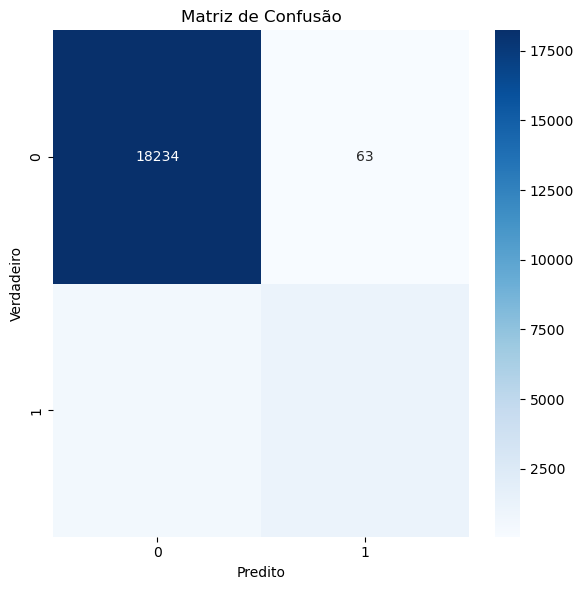

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Exibir a matriz de confusão com rótulos
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],  # Rótulos para as classes
            yticklabels=['0', '1'])  # Rótulos para as classes

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')

# Ajustar o layout para evitar cortes
plt.tight_layout()

# Exibir a figura
plt.show()

In [26]:
print("Previsão falou que era diabeticos(1) mas não era diabeticos(0)")
print(63)
print("Previsão falou que não era diabeticos(0) mas era diabeticos(1)")
print(522)
print("Total de erros do modelo")
print(63+522)
print("Total de Acertos do Modelo")
print(18234+1181)

Previsão falou que era diabeticos(1) mas não era diabeticos(0)
63
Previsão falou que não era diabeticos(0) mas era diabeticos(1)
522
Total de erros do modelo
585
Total de Acertos do Modelo
19415



                                                                RESUMO: 
Com esses resultados no meu modelo preditivo de diabetes, mostra que podemos fazer tratamentos preventivos para aqueles que não sejam diabeticos se tornarem diabeticos, evitando custos e danos daqueles clientes, compensando os possiveis erros, já que a previsão bateu cerca de 97% de exito.